# Classification


Back in the Review Notebook we had Women Athlete Data that looked like:

Name | 	Sport	| Height | 	Weight
:---: | :---: | :---: | :---: 
0	| Asuka Teramoto	| Gymnastics	| 54	| 66
1	| Brittainey Raven | 	Basketball	| 72	| 162
2	| Chen Nan	| Basketball	| 78	| 204
3	| Gabby Douglas	| Gymnastics	| 49 | 	90
4	| Helalia Johannes	| Track	| 65 | 	99
5	| Irina Miketenko	| Track	| 63	| 106
6	| Jennifer Lacy	| Basketball | 	75	 | 175
7	| Kara Goucher	| Track	| 67	| 123
8	| Linlin Deng	| Gymnastics	| 54  | 68
9	| Nakia Sanford	| Basketball	| 76	| 200

We looked over the data and then came up with `if` rules that used height and weight to predict what sport someone played. So, for example, we might have a rule like:


    if athlete['Height'] > 60:
        return 'Gymnastics'
        

Once we wrote our rules we determined their accuracy by running them on our dataset. 

But notice there is a way of **cheating** and getting near perfect accuracy. Here's how. 

We look at the first entry of our data: Asuka Teramota who participates in Gymnastics and is 54 inches tall and weighs 66 pounds. We can write a rule specific to her:

    if athlete['Height'] == 54 and athlete['Weight'] == 66:
        return 'Gymnastics'

Then we look at the next row of our data, Brittainey Raven and add a rule for her:

    # the Asuka rule
    if athlete['Height'] == 54 and athlete['Weight'] == 66:
        return 'Gymnastics'
        
    # The Brittainey rule
    elif athlete['Height'] == 72 and athlete['Weight'] == 162:
        return 'Basketball'

and then add one for Chen Nan:

    # the Asuka rule
    if athlete['Height'] == 54 and athlete['Weight'] == 66:
        return 'Gymnastics'
        
    # The Brittainey rule
    elif athlete['Height'] == 72 and athlete['Weight'] == 162:
        return 'Basketball'

    # The Chen rule
    elif athlete['Height'] == 78 and athlete['Weight'] == 204:
        return 'Basketball'


and so on.

Now when we run our rules on the same dataset we should have 100% accuracy (or near 100%). For example, when we want to see what our prediction is for Asuka who is 54 inches tall and weighs 66 pounds, it perfectly matches (not surprisingly) rule 1 and we correctly predict *Gymnastics*. Of course if we have two athletes who are 54 inches tall anad 66 pounds -- one who is a gymnasts and the other a marathon runner -- one of our predictions will be wrong, but that will be a rare event.

#### over fitting
The rules we wrote overfit the data. Here's the problem in tuning the rules so precisely to fit our data. Suppose we want to classify what sport a new person plays given that she is 53 inches tall and 67 pounds. That doesn't exactly match anyone in the data so our rules fail, but our common sense tells us she is likely to participate in gymnastics. So when we overfit on the data we trained on, we may lower the performance on new -- sight unseen -- data. Here are some terms that will help us in our discussion.

### Training Set
The training set is the dataset that we use to train our system. In the above case we wrote the rules by hand, so the training set is the data we looked at to determine what rules to construct.  Shortly, we will have our laptops come up with rules on its own. In that case we give our program a training set. The program examines and analyzes the training data and comes up with a program that will classify instances (in the above case, classify athletes by what sport they play). 

### Test Set
The test set is a dataset that we use to test the accuracy of our system. It is used to answer the question: "How well did my classifier work?" 

In both our previous Titanic work, and our Althlete work the training set and the test set were the same. And we have seen above, this is an exceedingly bad idea. Doing this will overestimate the accuracy of our system compared to testing on new data. 

A better test of your prowess at writing rules would be to give you a training set and let you write rules. Then I would takes your rules and run them on a dataset you have never seen before.  

Dividing a dataset into a training set and a test set is common practice. For example, if we have 1,000 rows in our data we might use 900 rows for training and reserve 100 for testing. 


# Training a classifier

We are going to give our program a training set. For example,

Name | 	Sport	| Height | 	Weight
:---: | :---: | :---: | :---: 
0	| Asuka Teramoto	| Gymnastics	| 54	| 66
1	| Brittainey Raven | 	Basketball	| 72	| 162
2	| Chen Nan	| Basketball	| 78	| 204


And ask the program to **build a classifier** that will predict the values of one column based on the values of other columns (just as you did by hand). This is step 1: building a classifier.

Once the classifier is built we can use it to make predictions. And we can determine the accuracy of the classifier by running it on the test set. 

Again, instead of us writing the rules we are going to have our laptops do so. This is called:

## machine learning

Machine learning is a very large subject.  This Python Notebook will introduce you to the general idea.


### Step one - load the data

Even though it is a small dataset let's go ahead and use the athlete dataset available at:
https://raw.githubusercontent.com/zacharski/machine-learning/master/data/athletes.csv

In [1]:
import pandas as pd
athletes = pd.read_csv('https://raw.githubusercontent.com/zacharski/machine-learning/master/data/athletes.csv')
athletes.head()

,Name,Sport,Height,Weight
0,Asuka Teramoto,Gymnastics,54,66
1,Brittainey Raven,Basketball,72,162
2,Chen Nan,Basketball,78,204
3,Gabby Douglas,Gymnastics,49,90
4,Helalia Johannes,Track,65,99


### Step two - divide the data into a training and a test set.

Python has a library that can automatically divide data into training and test sets. Let's say we want those datasets called `athletes_train` and `athletes_test` and we want 80% of the data used for training and 20% for testing:

In [29]:
from sklearn.model_selection import train_test_split
athletes_train, athletes_test = train_test_split(athletes, test_size = 0.2)
athletes_train

,Name,Sport,Height,Weight
21,Simone Biles,Gymnastics,57,104
26,Shalane Flanagan,Track,65,106
16,Tatyana Petrova,Track,63,108
13,Rene Kalmer,Track,70,108
6,Jennifer Lacy,Basketball,75,175
12,Rebecca Tunney,Gymnastics,58,77
2,Chen Nan,Basketball,78,204
10,Nikki Blue,Basketball,68,163
3,Gabby Douglas,Gymnastics,49,90
24,Seimone Augustus,Basketball,72,166


So we have the function `train_test_split` which takes the name of the original dataset as an argument as well as a `test_size` parameter specifying 20% of the data will be used for testing. It randomly selects rows of the original dataset so 80% are in the training data and 20% in the testing and returns these two dataframes. We assign the variables names `athletes_train` and `athletes_test` to these dataframes.

### Step three - create a decision tree classifer
Again, in other courses we can learn about the different kinds of classifiers, what settings they take, and how they actually work, but for now let's treat it as magic -- as a black box. Let's create and train a Decision Tree Classifier.

First create the classifier:




In [17]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy')

### Step 4 - Train the classifier on the training data
We do this with the fit method, which takes two arguments. The first is a dataframe of the columns of the data that we want to use to make the prediction. The second  is the column data we want to predict. In our case we want to use height and weight to predict sport. So our `athletes_train` dataframe looks like:


index| Name | 	Sport	| Height | 	Weight
:---: | :---: | :---: | :---: 
21	| Simone Biles	| Gymnastics	| 57	| 104
26	| Shalane Flanagan | 	Track	| 65	| 106
16	| Tatyana Petrova	| Track	| 63	| 108
13	| Rene Kalmer	| Track	| 70	| 108
6	| Jennifer Lacy	| Basketball	| 75	| 175
12	| Rebecca Tunney | 	Gymnastics	| 58	| 77
2	| Chen Nan	| Basketball	| 78	| 204


and we want to divide it up so that the first argument given to `fit` is

index| Height | 	Weight
:---: | :---: | :---: 
21	| 57	| 104
26		| 65	| 106
16	| 63	| 108
13	| 70	| 108
6	| 75	| 175
12	| 58	| 77
2	| 78	| 204

This is just the columns we want to use for our rules. These are commonly called **features** and in this specific case we can get them using the Pandas expression:

    athletes_train[['Height', 'Weight']]
    
And the second argument to fit is just the column that contains the values we want to predict. These are often called the **labels**.

index|  	Sport	
:---: | :---: 
21	|  Gymnastics	
26	| 	Track	
16	| Track	
13	| Track	
6	| Basketball	
12	| 	Gymnastics	
2	| Basketball	


We can get this column using:

    athletes_train['Sport']
    
Let's put this altogether and train our classifier using `fit`:

In [20]:
clf.fit(athletes_train[['Height', 'Weight']], athletes_train['Sport'])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

The fit method trains the classifier.  The Decision Tree Classifier is sort of like a 20-questions type classifier. It creates a set of yes-no questions much like we do when we play 20-questions. 

* *Does it have horns?*
* *Is it bigger than a dog?*

Looking inside a classifier to see the questions requires you to install several packages on your laptop so I will just show you what it looks like:

<img src="http://zacharski.org/files/courses/data101/athletes_tree.png"  width = "700"/>

So the first question is: *Does the person weigh less than or equal to 139?*

If the answer is *no* we predict basketball player.

If the answer is *yes* we ask if the height is less than or equal to 62.5. If it isn't, we guess track. and so on.

If you want to install the packages, I provide the code to generate the nice picture here:

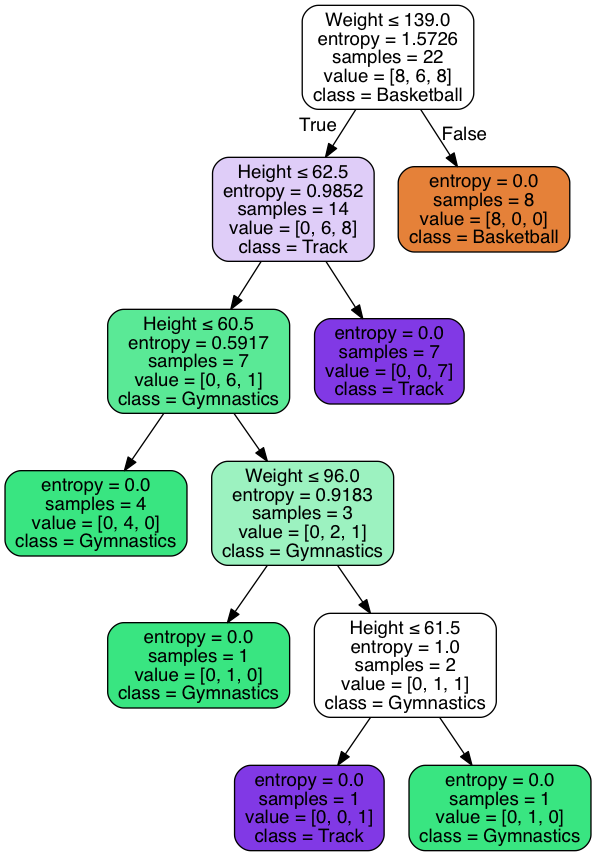

In [21]:
from IPython.display import Image  
import pydotplus
dot_data = tree.export_graphviz(clf, out_file="iris.dot", 
                         feature_names=['Height', 'Weight'],  
                         class_names=['Basketball', 'Gymnastics',  'Track'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graphviz.graph_from_dot_file("iris.dot")
#graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png()) 

### Step 5. Make predictions
Now that we trained the classifier we can use it to make predictions using the `predict` method

In [23]:
athlete_predictions = clf.predict(athletes_test[['Height', 'Weight']])
athlete_predictions

array(['Track', 'Gymnastics', 'Gymnastics', 'Track', 'Gymnastics',
       'Basketball'], dtype=object)

So our classifier predicts:

    prediction
    -----
    Track 
    Gymnastics 
    Gymnastics
    Track
    Gymnastics
    Basketball
    
and the real values are:

In [15]:
athletes_test


,Name,Sport,Height,Weight
5,Irina Miketenko,Track,63,106
8,Linlin Deng,Gymnastics,54,68
3,Gabby Douglas,Gymnastics,49,90
18,Valeria Straneo,Track,66,97
19,Viktoria Komova,Gymnastics,61,76
14,Shanna Crossley,Basketball,70,155


### Step 6 Compute Accuracy

It is easy to eyeball our accuracy when we have so few examples (in this case we are 100% accurate). When we have larger datasets we can use a library that helps us compute accuracy. `accuracy_score` takes two arguments:
    
* our list of predictions
* the list of actual values

and outputs the accuracy.

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(athletes_test['Sport'], athlete_predictions)

1.0

So we are 100% accurate.


Let's try this using a new dataset

## Iris Dataset <span style="color:red">500 xp</span>

<img src="https://upload.wikimedia.org/wikipedia/commons/1/1e/IMG_7911-Iris_virginica.jpg" width="250" />

 We are going to use an Iris Dataset.  The data set contains 3 classes of Irises. Each class has 50 instances each

1. Iris Setosa 
2. Iris Versicolour 
3. Iris Virginica (the picture above)

There are only 4 attributes or features:

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 

Here is an example of the data:

Sepal Length|Sepal Width|Petal Length|Petal Width|Class
:--: | :--: |:--: |:--: |:--: 
5.3|3.7|1.5|0.2|Iris-setosa
5.0|3.3|1.4|0.2|Iris-setosa
5.0|2.0|3.5|1.0|Iris-versicolor
5.9|3.0|4.2|1.5|Iris-versicolor
6.3|3.4|5.6|2.4|Iris-virginica
6.4|3.1|5.5|1.8|Iris-virginica

The job of the classifier is to determine the class of an instance from the values of the features.


### Step One: Load the data

   https://raw.githubusercontent.com/zacharski/machine-learning/master/data/iris.csv
   

In [1]:
#TBD

### Step Two - divide the data into a training and a test set.
Let's use 20% of the data for the test set.

In [2]:
#TBD

### Step Three - create a decision tree classifier

In [3]:
#TBD

### Step Four - Train the classifier on the training data

In [4]:
#TBD

### Step 5. Make predictions on the test data

In [5]:
#TBD

### Step 6 Compute Accuracy

In [6]:
#TBD

How did you do? 

## Pima Indians Diabetes Dataset <span style="color:red">750 xp</span>

<img src="http://discovermagazine.com/~/media/Images/Issues/2005/May/genes-ladies.jpg" width="250" />

It is time to look at a new dataset, the Pima Indians Diabetes Data Set developed by the
United States National Institute of Diabetes and Digestive and Kidney Diseases. 

Astonishingly, over 30% of Pima people develop diabetes. In contrast, the diabetes rate in
the United States is 8.3% and in China it is 4.2%.

Each instance in the dataset represents information about a Pima woman over the age of 21
and belonged to one of two classes: a person who developed diabetes within five years, or a
person that did not. There are eight attributes in addition to the column representing whether or not they developed diabetes:


1.  The number of times the woman was pregnant
2.  Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3.  Diastolic blood pressure (mm Hg)
4.  Triceps skin fold thickness (mm) 
5.  2-Hour serum insulin (mu U/ml) 
6.  Body mass index (weight in kg/(height in m)^2) 
7.  Diabetes pedigree function 
8.  Age
9.  Whether they got diabetes or not (0 = no, 1 = yes)

The csv file at  is at

    https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data
    
<span style="color:red">This file does not have a header row</span>

You will need to 

1. load the file into a dataframe
2. divide the data into training and test sets. (an 80-20 split sounds good)
3. train a decision tree classifier on the training data
3. run the classifier on the test data
4. compute the accuracy


### hint
The file does not contain a header row. Suppose I create a list of column names and then use that when I read my csv file:


    columns = ['pregnant', 'glucose', 'bloodpressure', 'triceps_skin', 'insulin', 'bmi', 'pedigree', 'age', 'diabetes']
    diabetes  = pd.read_csv('pima.datafile', header=None, names=columns)

What's cool is that I can use that `columns` variable when I want use `fit` and `predict`. Recall that fit takes two arguments. The first is all the data columns I want to use to make the prediction (in this case all the columns except *diabetes*. The second argument is the values I want to predict (in this case *diabetes*. Here is how I can use my column variable:

    clf.fit(dia_train[columns[:-1]], dia_train[columns[-1]])



In [7]:
#TBD


In [8]:
#TBD


In [9]:
#TBD

# Predicting the Party of Members of The House Of Representatives <span style="color:red">750 xp</span>

<img src="https://goodmorningwilton.com/wp-content/uploads/2016/01/republican-elephant-and-democratic-donkey-icons-party-symbols.jpg" width="350" />

Using the  
1984 Congressional Voting Records Data Set  can we create a classifier that decides whether someone is a Democrat or Republican based on their votes on 16 key votes?

I'll help you get started.

In [75]:
columnNames = ['party', 'handicapped-infants',  'water-project-cost-sharing', 'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending', 'superfund-right-to-sue', 'crime' , 'duty-free-exports', 'export-administration-act-south-africa']
datafile = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'     
votes = pd.read_csv(datafile, header = None, names=columnNames)
votes.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


As you can see the data has an *n* in a cell when that person votes no on that bill, a *y* for yes and a *?* when the person didn't vote. Let's divide the data into training and test sets and then train the classifier: 

In [76]:
vtrain, vtest = train_test_split(votes, test_size = 0.2)
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(vtrain[columnNames[1:]], vtrain['party'])

ValueError: could not convert string to float: 'y'

**And that sort of blew up**

The problem is that the Decision Tree Classifier needs numeric data and can't process strings like *y* and *n*.

**There's an app for that**
Fortunately, there is a handy function that will automatically map the data into numeric values:

In [77]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
votes2 = votes.apply(le.fit_transform)
votes2.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,1,1,2,1,2,2,2,1,1,1,2,0,2,2,2,1,2
1,1,1,2,1,2,2,2,1,1,1,1,1,2,2,2,1,0
2,0,0,2,2,0,2,2,1,1,1,1,2,1,2,2,1,1
3,0,1,2,2,1,0,2,1,1,1,1,2,1,2,1,1,2
4,0,2,2,2,1,2,2,1,1,1,1,2,0,2,2,2,2


## Now its your turn
With that introduction you should be able to finish this task on your own.

In [10]:
#TBD

In [11]:
#TBD

In [12]:
#TBD

# The 115th Congress   <span style="color:red">2000 xp</span>
<img src="http://3.bp.blogspot.com/-JCFOE9moLMY/USJq5xLj0FI/AAAAAAAAAUg/abkl8SA5SwQ/s1600/Dividist+Logo.png" width="350" />

We just worked on the 1984 congress. Now let's move to the 2017 Congress. Do you think your accuracy will be better or worse?

We will look at how House members voted on the following bills:
* H.J.Res. 38: Disapproving the rule submitted by the Department of the Interior known as the Stream Protection Rule.
* H.R. 36: Pain-Capable Unborn Child Protection Act
* H.R. 1177: Removing Outdated Restrictions to Allow for Job Growth Act
* H.R. 1628: American Health Care Act of 2017
* H.Res. 74: Providing for consideration of the joint resolution (H.J. Res. 36) providing for congressional disapproval under chapter 8 of title 5, United States Code, of the final rule of the Bureau of Land Management relating to “Waste Prevention, Produc
* H.R. 1430: HONEST Act
* H.R. 3004: Kate’s Law
* H.R. 2521: South Carolina Peanut Parity Act of 2017
* H.R. 3441: Save Local Business Act
* H.R. 3043: Hydropower Policy Modernization Act of 2017
* H.R. 2201: Micro Offering Safe Harbor Act

I downloaded the data from [GovTrack](https://www.govtrack.us/congress/votes). The vote for each bill is in a separate file. A zip file of a directory containing these files is available at [http://zacharski.org/files/courses/data101/congress2017.zip](http://zacharski.org/files/courses/data101/congress2017.zip)

This task will require the skills you learned in the cleaning data course.

To help you a bit, I created a Python dictionary with the names of the vote column in the respective files.



In [164]:
vote_names = {'hr36':   'unborn_child_protection',
              'hr38':   'anti_stream_protection',
              'hr74':  'blm_waste',
              'hr1177': 'remove_restrictions',
              'hr1430': 'honest_act',
              'hr1628': 'american_health_care_act',
              'hr2201': 'safe_harbor', 
              'hr2521': 'peanut_parity_act',
              'hr3004': 'kates_law',
              'hr3043': 'hydropower_modernization',
              'hr3441': 'save_local_business'
             }

### You task is to create and evaulate a classifier for the 115th congress. 
Can you predict who is a Democrat or Republican based on their voting history?

In [13]:
#TBD

In [14]:
#TBD

In [15]:
#TBD
